In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve

In [2]:
# Import and view the train dataset
df = pd.read_csv('UCI_data.csv', parse_dates =['date'], index_col ='date')
df.head(10)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
date,,,,,,,,,,,,,,,,,,,,,
2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,62.166667,...,33.90,9.700000,766.100000,65.500000,3.500000,40.000000,3.350000,24.061869,24.061869,60
2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,43.560000,...,41.09,0.300000,740.333333,99.000000,1.000000,41.333333,0.100000,4.622052,4.622052,50
2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,46.126667,...,38.76,4.400000,768.466667,72.000000,6.000000,22.666667,-0.266667,5.635898,5.635898,80
2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,47.700000,...,39.20,3.350000,760.600000,82.000000,5.500000,41.000000,0.500000,49.216445,49.216445,40
2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,50.745000,...,43.73,3.200000,738.900000,88.000000,7.333333,56.000000,1.400000,47.617579,47.617579,60
2016-02-16 15:40:00,21.790000,34.730000,19.760000,35.400000,21.230000,35.200000,20.100000,34.760000,19.033333,38.400000,...,40.20,4.633333,770.866667,52.333333,2.333333,40.000000,-4.333333,16.431218,16.431218,50
2016-02-13 01:50:00,21.200000,38.090000,19.166667,38.790000,20.890000,39.530000,19.390000,39.590000,19.588889,70.750556,...,41.09,0.416667,741.000000,90.833333,1.833333,23.166667,-0.900000,33.547313,33.547313,60
2016-01-24 22:30:00,21.890000,41.730000,21.200000,40.933333,20.500000,44.260000,18.426667,47.200000,18.791111,62.654444,...,49.23,8.000000,767.300000,95.000000,3.500000,62.000000,7.250000,15.230781,15.230781,400
2016-03-23 10:20:00,21.760000,41.200000,19.390000,46.263333,22.100000,38.230000,21.200000,39.156667,19.890000,48.590000,...,40.59,7.633333,756.133333,87.000000,3.333333,50.666667,5.566667,41.004196,41.004196,80


In [3]:
df = df.sort_values(by=['date'])
df = df.resample('H', closed='left', label='left').mean()
df

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,...,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000
2016-01-11 18:00:00,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,...,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333
2016-01-11 19:00:00,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,...,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333
2016-01-11 20:00:00,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,...,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000
2016-01-11 21:00:00,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,...,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667
2016-01-11 22:00:00,21.572222,44.663333,20.905556,44.118889,20.469444,45.829444,20.108889,47.506667,19.112917,53.129306,...,44.527639,5.725000,736.008333,87.583333,6.416667,40.000000,3.741667,27.143708,27.143708,288.333333
2016-01-11 23:00:00,21.531667,44.271111,20.934444,43.712500,20.317917,45.695833,20.909722,46.551250,19.275000,50.923333,...,45.241111,5.650000,736.550000,89.083333,6.583333,32.500000,3.925000,29.209795,29.209795,75.000000
2016-01-12 00:00:00,21.266111,44.960556,20.637222,44.018333,20.144444,45.542222,20.514444,47.112778,19.155556,50.396111,...,45.875000,5.216667,737.150000,92.000000,6.000000,29.500000,4.016667,26.296718,26.296718,158.333333
2016-01-12 01:00:00,20.963611,45.613194,20.333333,44.273333,20.133333,45.540000,21.505556,46.946667,18.969444,50.076111,...,46.307778,5.141667,737.833333,92.000000,5.583333,40.000000,3.941667,28.723073,28.723073,176.666667


In [4]:
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour
df

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,month,day,dayofweek,hour
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,...,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000,1,11,0,17
2016-01-11 18:00:00,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,...,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333,1,11,0,18
2016-01-11 19:00:00,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,...,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333,1,11,0,19
2016-01-11 20:00:00,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,...,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000,1,11,0,20
2016-01-11 21:00:00,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,...,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667,1,11,0,21
2016-01-11 22:00:00,21.572222,44.663333,20.905556,44.118889,20.469444,45.829444,20.108889,47.506667,19.112917,53.129306,...,6.416667,40.000000,3.741667,27.143708,27.143708,288.333333,1,11,0,22
2016-01-11 23:00:00,21.531667,44.271111,20.934444,43.712500,20.317917,45.695833,20.909722,46.551250,19.275000,50.923333,...,6.583333,32.500000,3.925000,29.209795,29.209795,75.000000,1,11,0,23
2016-01-12 00:00:00,21.266111,44.960556,20.637222,44.018333,20.144444,45.542222,20.514444,47.112778,19.155556,50.396111,...,6.000000,29.500000,4.016667,26.296718,26.296718,158.333333,1,12,1,0
2016-01-12 01:00:00,20.963611,45.613194,20.333333,44.273333,20.133333,45.540000,21.505556,46.946667,18.969444,50.076111,...,5.583333,40.000000,3.941667,28.723073,28.723073,176.666667,1,12,1,1


In [5]:
# Splitting data into training and unseen data
train, unseen = train_test_split(df, test_size=0.15)

In [6]:
# Split the data into features and target, removing "ID" from features data frame
X = train.drop(['TARGET_energy'], axis=1)
Y = train[['TARGET_energy']]

In [7]:
# Split the data into features and target, removing "ID" from features data frame
unseenX = unseen.drop(['TARGET_energy'], axis=1)
unseenY = unseen[['TARGET_energy']]

<Figure size 432x288 with 0 Axes>

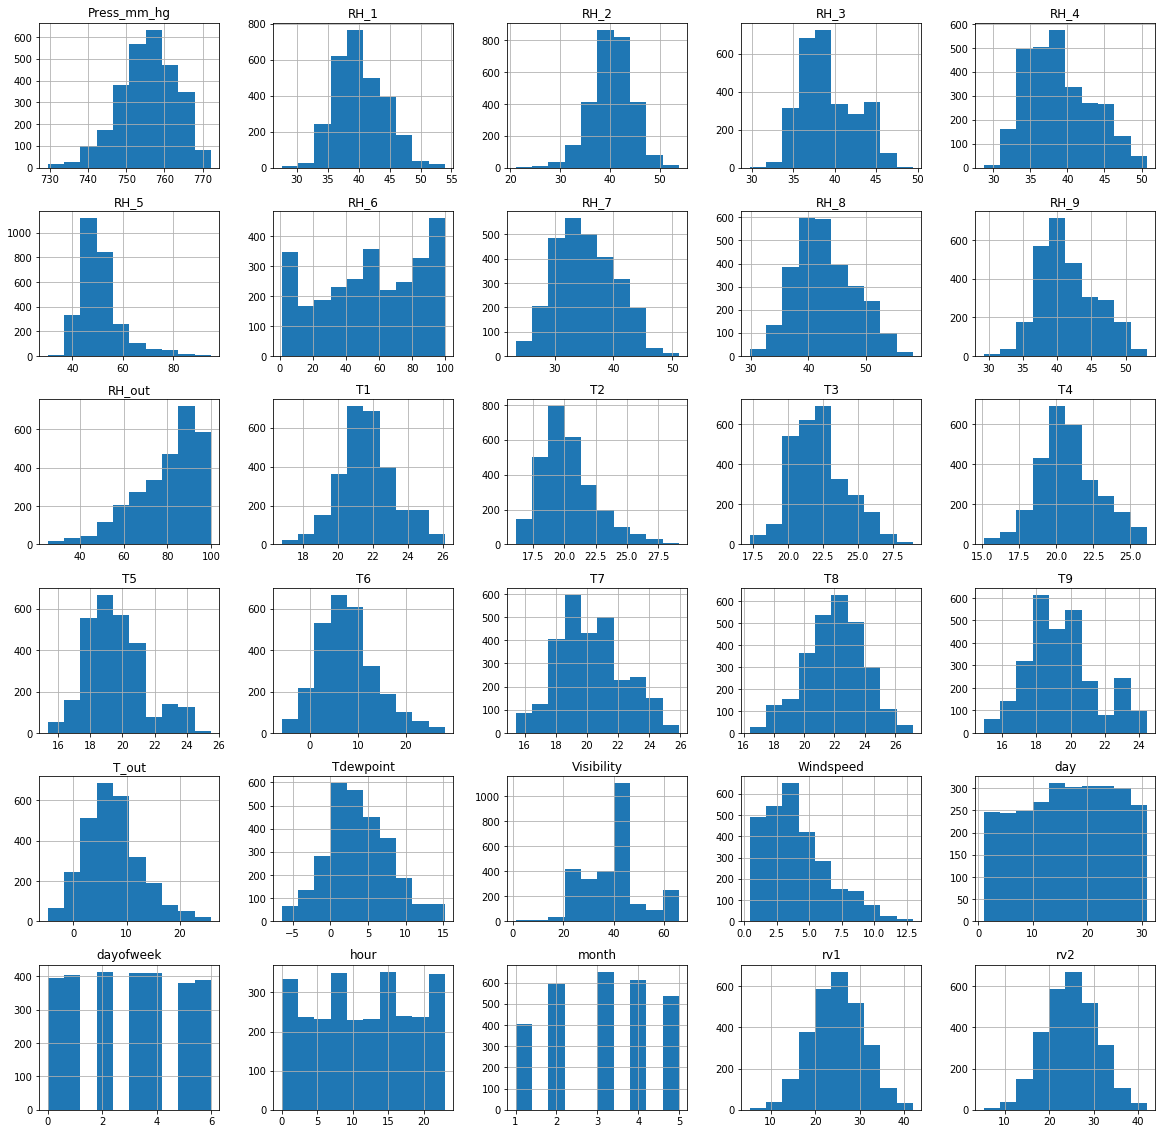

In [8]:
# Plot the histogram of each feature
plt.figure()
X.hist(figsize=(20,20))
plt.show()

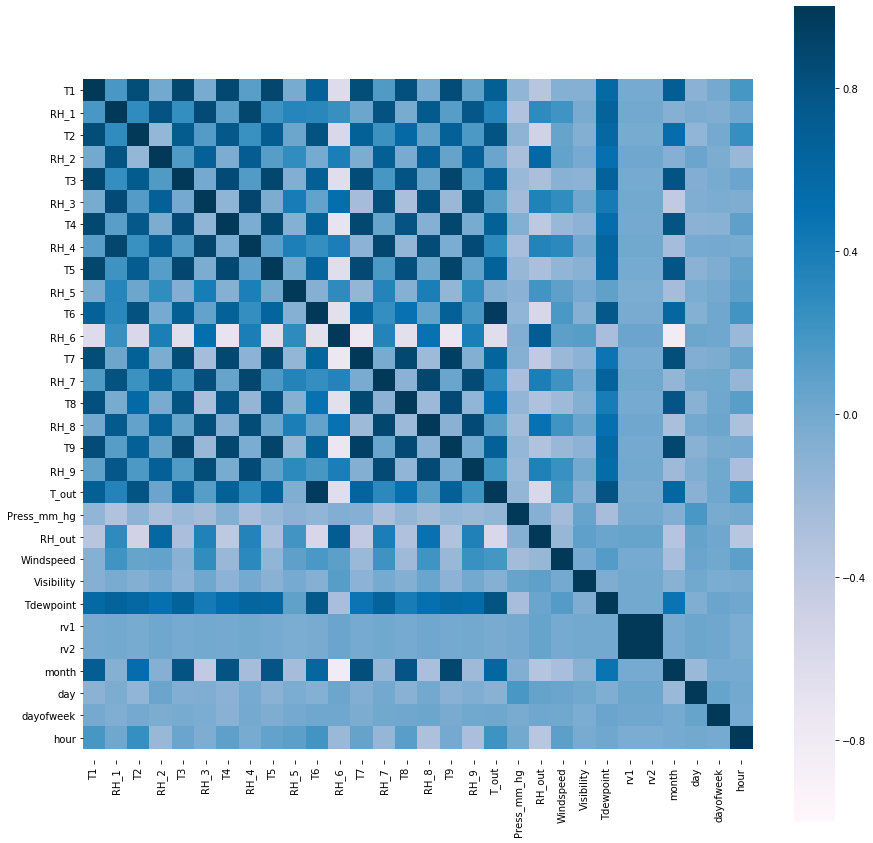

In [9]:
# Plot the correlation heatmap
import seaborn as sns
correlations = X.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap="PuBu", center=0, vmin=-1, vmax=1, square=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

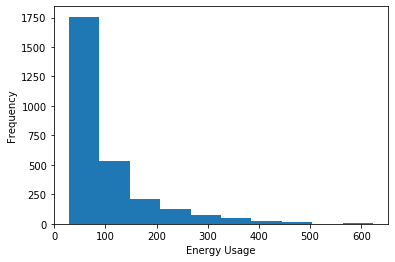

In [10]:
plt.hist(Y['TARGET_energy'], density = False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Energy Usage');

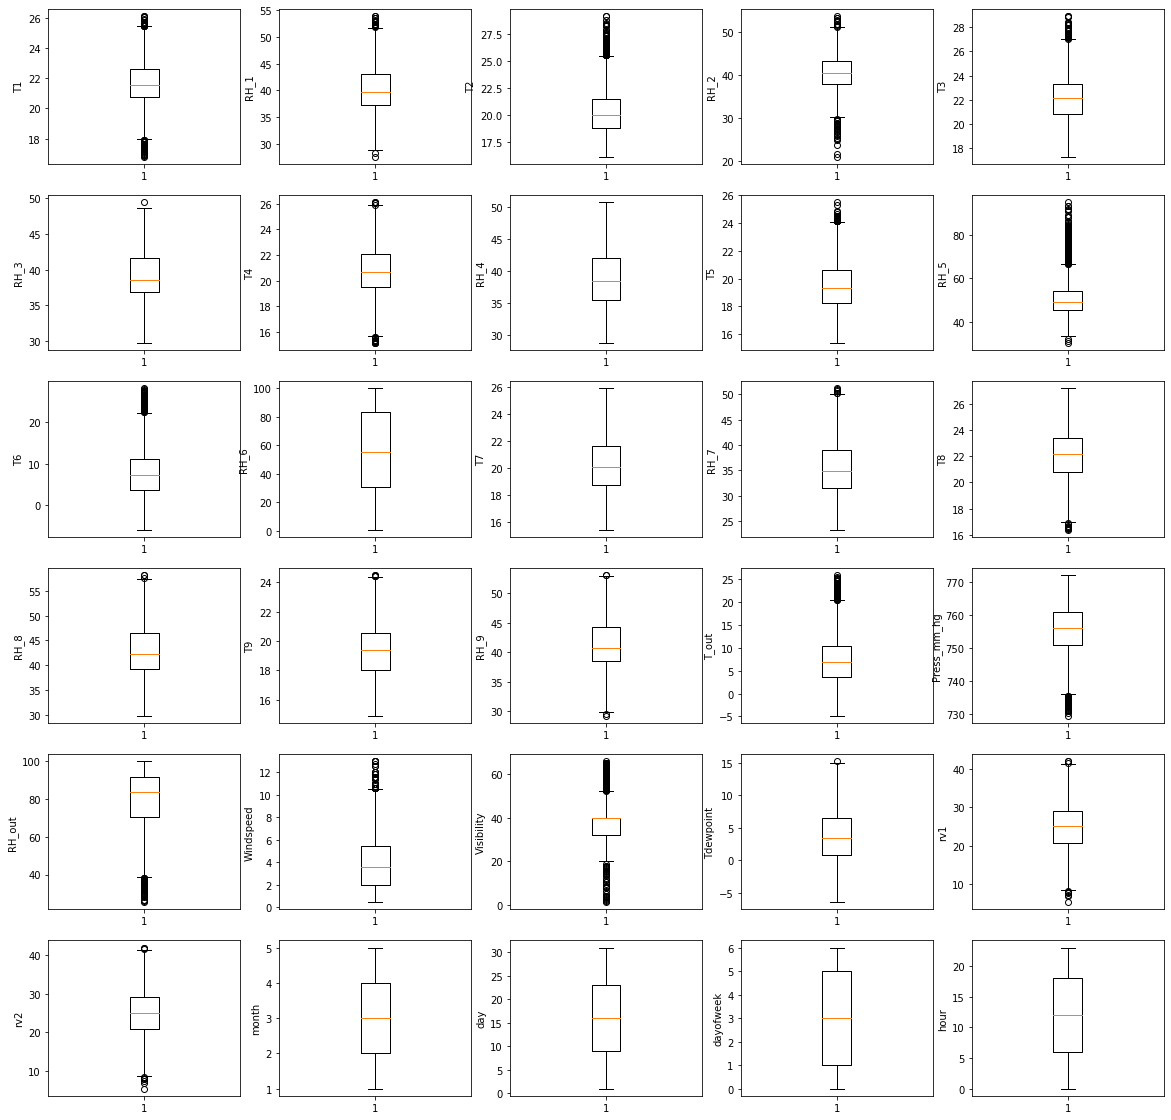

In [11]:
target = 'TARGET_energy'
fig, axes = plt.subplots(nrows = 6, ncols = 5, figsize = (20, 20))
for i, xvar in enumerate(X.columns):
    if i < 5:
        axes[0][i].boxplot(X[xvar])
        axes[0][i].set(ylabel = xvar)
    elif i < 10:
        axes[1][i - 5].boxplot(X[xvar])
        axes[1][i - 5].set(ylabel = xvar)
    elif i < 15:
        axes[2][i - 10].boxplot(X[xvar])
        axes[2][i - 10].set(ylabel = xvar)
    elif i < 20:
        axes[3][i - 15].boxplot(X[xvar])
        axes[3][i - 15].set(ylabel = xvar)
    elif i < 25:
        axes[4][i - 20].boxplot(X[xvar])
        axes[4][i - 20].set(ylabel = xvar)
    elif i < 30:
        axes[5][i - 25].boxplot(X[xvar])
        axes[5][i - 25].set(ylabel = xvar)

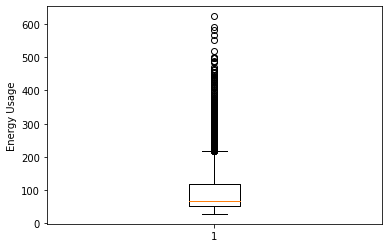

In [12]:
plt.boxplot(Y['TARGET_energy'])
plt.ylabel('Energy Usage');

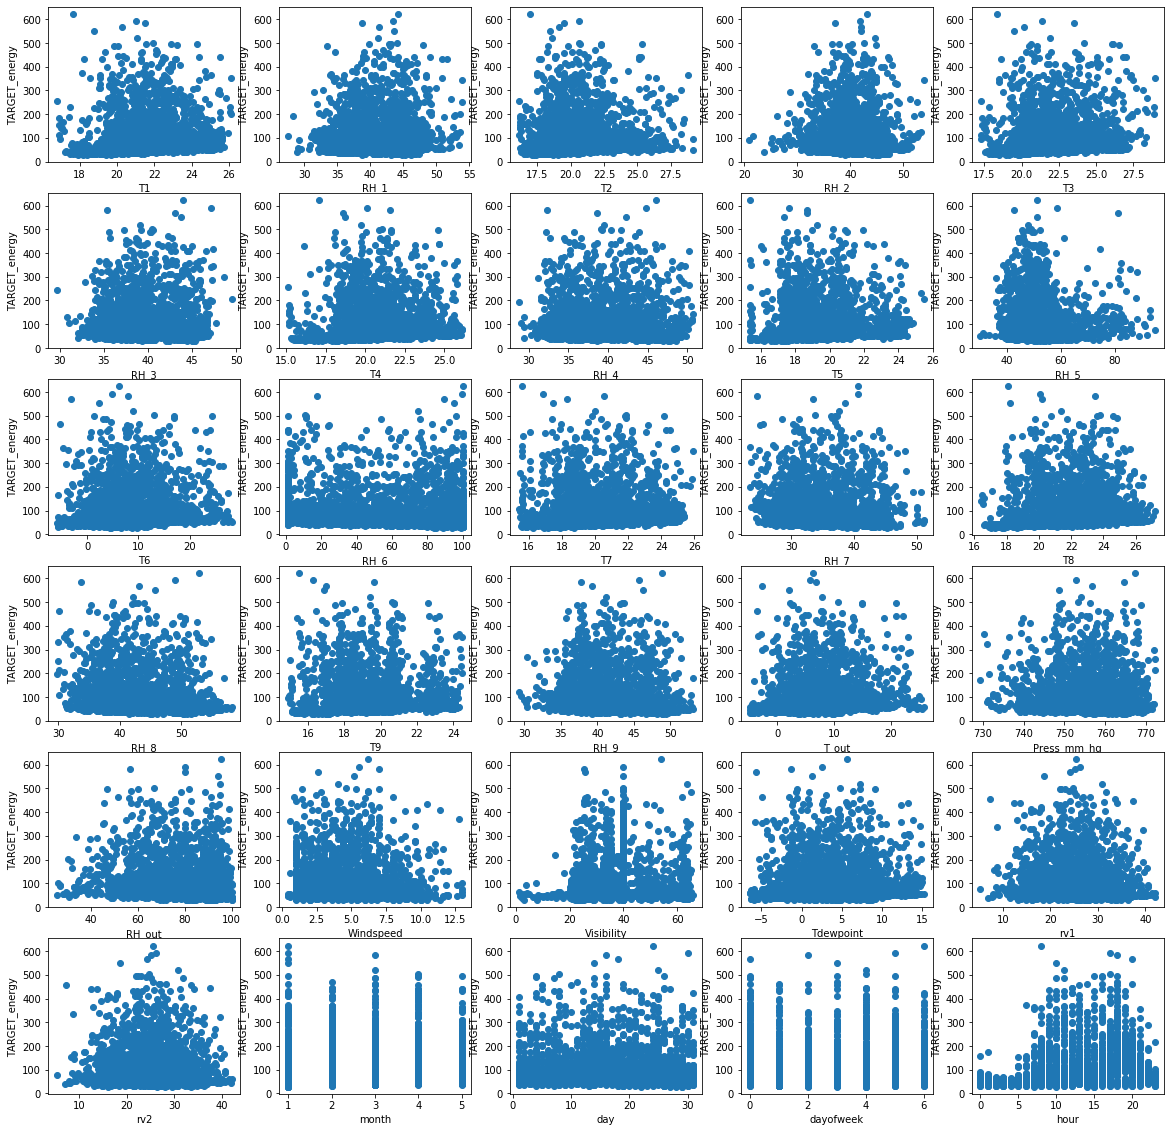

In [13]:
target = 'TARGET_energy'
fig, axes = plt.subplots(nrows = 6, ncols = 5, figsize = (20, 20))
for i, xvar in enumerate(X.columns):
    if i < 5:
        axes[0][i].scatter(x = X[xvar], y = Y[target])
        axes[0][i].set(xlabel = xvar, ylabel = target)
    elif i < 10:
        axes[1][i - 5].scatter(x = X[xvar], y = Y[target])
        axes[1][i - 5].set(xlabel = xvar, ylabel = target)
    elif i < 15:
        axes[2][i - 10].scatter(x = X[xvar], y = Y[target])
        axes[2][i - 10].set(xlabel = xvar, ylabel = target)
    elif i < 20:
        axes[3][i - 15].scatter(x = X[xvar], y = Y[target])
        axes[3][i - 15].set(xlabel = xvar, ylabel = target)
    elif i < 25:
        axes[4][i - 20].scatter(x = X[xvar], y = Y[target])
        axes[4][i - 20].set(xlabel = xvar, ylabel = target)
    elif i < 30:
        axes[5][i - 25].scatter(x = X[xvar], y = Y[target])
        axes[5][i - 25].set(xlabel = xvar, ylabel = target)

In [14]:
warnings.filterwarnings('ignore')
X_scaled = MinMaxScaler().fit_transform(X)
unseenX_scaled = MinMaxScaler().fit_transform(unseenX)

In [15]:
# Splitting data into training and testing data
trainX, testX, trainY, testY = train_test_split(X_scaled, Y, test_size=0.2)

Text(0.5, 0, 'Number of features selected')

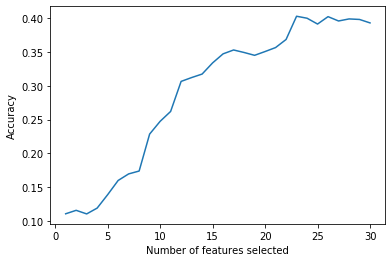

In [16]:
warnings.filterwarnings('ignore')
k_all = np.arange(1,30+1)
acc_hold = []
for k in k_all:
    featureSelector = SelectKBest(score_func = f_regression, k = k).fit(trainX, trainY)
    trainX_new = featureSelector.transform(trainX) 

    svm = SVR(C = 1000, gamma = 1)
    scores = cross_val_score(svm, trainX_new, trainY, cv = 10, n_jobs = -1)
    acc_hold.append(scores.mean())

plt.plot(k_all, acc_hold)
plt.ylabel('Accuracy')
plt.xlabel('Number of features selected')

In [55]:
warnings.filterwarnings('ignore')
att_names = df.columns[:-1]
featureSelector = SelectKBest(score_func = f_regression, k = 23).fit(trainX, trainY)

# get the selected feature vectors
trainX_kBest = featureSelector.transform(trainX)
testX_kBest = featureSelector.transform(testX)

In [18]:
warnings.filterwarnings('ignore')
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']} 

grid = GridSearchCV(SVR(), param_grid, cv = 3, verbose = False, n_jobs = -1)
grid.fit(trainX_kBest,trainY)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [19]:
print(grid.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [87]:
warnings.filterwarnings('ignore')
svm = SVR(C = 1000, gamma = 1, kernel = 'rbf')
svm.fit(trainX_kBest, trainY)
pred = svm.predict(testX_kBest)

# Calculating Mean Square Error and R2 Score
mse_svm_rbf = mean_squared_error(testY, pred)
print('Mean squared error of the SVM RBF Model is: ', mse_svm_rbf)
score_svm_rbf = svm.score(testX_kBest, testY)
print ('R2 Score of the SVM RBF Model is: ', score_svm_rbf)

Mean squared error of the SVM RBF Model is:  3959.2039026121615
R2 Score of the SVM RBF Model is:  0.4038596701704156


In [88]:
pred = svm.predict(trainX_kBest)

# Calculating Mean Square Error and R2 Score
mse_svm_rbf_train = mean_squared_error(trainY, pred)
print('Mean squared error of the SVM RBF Model is: ', mse_svm_rbf_train)
score_svm_rbf_train = svm.score(trainX_kBest,trainY)
print ('R2 Score of the SVM RBF Model is: ', score_svm_rbf_train)

Mean squared error of the SVM RBF Model is:  2620.2770805527266
R2 Score of the SVM RBF Model is:  0.6246141619538668


In [89]:
unseenX_kBest = featureSelector.transform(unseenX_scaled)

pred = svm.predict(unseenX_kBest)

# Calculating Mean Square Error and R2 Score
mse_svm_rbf_unseen = mean_squared_error(unseenY, pred)
print('Mean squared error of the SVM RBF Model is: ', mse_svm_rbf_unseen)
score_svm_rbf_unseen = svm.score(unseenX_kBest, unseenY)
print ('R2 Score of the SVM RBF Model is: ', score_svm_rbf_unseen)

Mean squared error of the SVM RBF Model is:  4475.957389589468
R2 Score of the SVM RBF Model is:  0.3658251704789186


In [21]:
warnings.filterwarnings('ignore')
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto'], 
              'kernel': ['linear', 'poly']} 

grid = GridSearchCV(SVR(), param_grid, cv = 3, verbose = False, n_jobs = -1)
grid.fit(trainX_kBest,trainY)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [22]:
print(grid.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


In [84]:
svm = SVR(C = 100, gamma = 'scale', kernel = 'poly')
svm.fit(trainX_kBest, trainY)
pred = svm.predict(testX_kBest)

# Calculating Mean Square Error and R2 Score
mse_svm_poly = mean_squared_error(testY, pred)
print('Mean squared error of the SVM Poly Model is:: ', mse_svm_poly)
score_svm_poly = svm.score(testX_kBest, testY)
print ('R2 Score of the SVM Poly Model is: ', score_svm_poly)

Mean squared error of the SVM Poly Model is::  4395.547215188558
R2 Score of the SVM Poly Model is:  0.33815912716311924


In [85]:
pred = svm.predict(trainX_kBest)

# Calculating Mean Square Error and R2 Score
mse_svm_poly_train = mean_squared_error(trainY, pred)
print('Mean squared error of the SVM Poly Model is: ', mse_svm_poly_train)
score_svm_poly_train = svm.score(trainX_kBest,trainY)
print ('R2 Score of the SVM Poly Model is: ', score_svm_poly_train)

Mean squared error of the SVM Poly Model is:  4129.736157930428
R2 Score of the SVM Poly Model is:  0.4083662067421052


In [86]:
unseenX_kBest = featureSelector.transform(unseenX_scaled)

pred = svm.predict(unseenX_kBest)

# Calculating Mean Square Error and R2 Score
mse_svm_poly_unseen = mean_squared_error(unseenY, pred)
print('Mean squared error of the SVM Poly Model is: ', mse_svm_poly_unseen)
score_svm_poly_unseen = svm.score(unseenX_kBest, unseenY)
print ('R2 Score of the SVM Poly Model is: ', score_svm_poly_unseen)

Mean squared error of the SVM Poly Model is:  4954.103788693007
R2 Score of the SVM Poly Model is:  0.2980791253885702


Text(0.5, 0, 'Number of features selected')

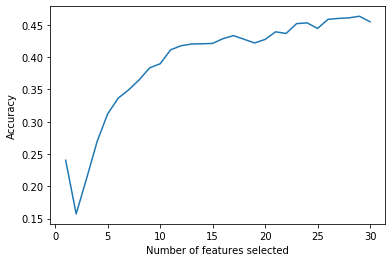

In [25]:
warnings.filterwarnings('ignore')
k_all = np.arange(1,30+1)
acc_hold = []
for k in k_all:
    featureSelector = SelectKBest(score_func = f_regression, k = k).fit(trainX, trainY)
    trainX_new = featureSelector.transform(trainX) 

    rf = RandomForestRegressor(max_depth = 100, max_features = 'auto', 
                           min_samples_leaf = 3, min_samples_split = 6, n_estimators = 100)
    scores = cross_val_score(rf, trainX_new, trainY, cv = 10, n_jobs = -1)
    acc_hold.append(scores.mean())

plt.plot(k_all, acc_hold)
plt.ylabel('Accuracy')
plt.xlabel('Number of features selected')

In [50]:
att_names = df.columns[:-1]
featureSelector = SelectKBest(score_func = f_regression, k = 29).fit(trainX, trainY)

# get the selected feature vectors
trainX_kBest = featureSelector.transform(trainX)
testX_kBest = featureSelector.transform(testX)

In [69]:
warnings.filterwarnings('ignore')
param_grid = {
    'max_depth': [50, 100, 150],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6, 8, 10],
    'n_estimators': [10, 50, 100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = False)
grid_search.fit(trainX_kBest, trainY)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150], 'max

In [70]:
print(grid_search.best_params_)

{'max_depth': 150, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [71]:
warnings.filterwarnings('ignore')
rf = RandomForestRegressor(max_depth = 150, max_features = 'auto', 
                           min_samples_leaf = 3, min_samples_split = 4, n_estimators = 100)
rf.fit(trainX_kBest, trainY)
pred = rf.predict(testX_kBest)

# Calculating Mean Square Error and R2 Score
mse_rf = mean_squared_error(testY, pred)
print('Mean squared error of the RandomForestRegressor Model is: ', mse_rf)
score_rf = rf.score(testX_kBest,testY)
print ('R2 Score of the RandomForestRegressor Model is: ', score_rf)

Mean squared error of the RandomForestRegressor Model is:  3806.098731377995
R2 Score of the RandomForestRegressor Model is:  0.4269128317461386


In [72]:
pred = rf.predict(trainX_kBest)

# Calculating Mean Square Error and R2 Score
mse_rf_train = mean_squared_error(trainY, pred)
print('Mean squared error of the RandomForestRegressor Model is: ', mse_rf_train)
score_rf_train = rf.score(trainX_kBest,trainY)
print ('R2 Score of the RandomForestRegressor Model is: ', score_rf_train)

Mean squared error of the RandomForestRegressor Model is:  1153.5590673898262
R2 Score of the RandomForestRegressor Model is:  0.8347389516697594


In [73]:
unseenX_kBest = featureSelector.transform(unseenX_scaled)

pred = rf.predict(unseenX_kBest)

# Calculating Mean Square Error and R2 Score
mse_rf_unseen = mean_squared_error(unseenY, pred)
print('Mean squared error of the RandomForestRegressor Model is: ', mse_rf_unseen)
score_rf_unseen = rf.score(unseenX_kBest,unseenY)
print ('R2 Score of the RandomForestRegressor Model is: ', score_rf_unseen)

Mean squared error of the RandomForestRegressor Model is:  4689.327780046287
R2 Score of the RandomForestRegressor Model is:  0.3355938435883803


In [90]:
# Display table containing the Mean Square Error and R2 Score of different regression models
regression_names = ["SVC RBF", "Random Forest Regressor"]
mse_testing = [mse_svm_rbf, mse_rf]
mse_training = [mse_svm_rbf_train, mse_rf_train]
mse_unseen = [mse_svm_rbf_unseen, mse_rf_unseen]
scores_testing = [score_svm_rbf, score_rf]
scores_training = [score_svm_rbf_train, score_rf_train]
scores_unseen = [score_svm_rbf_unseen, score_rf_unseen]
pd.DataFrame({"Regression": regression_names, "MSE (Testing)": mse_testing, "MSE (Training)": mse_training,
              "MSE (Unseen)": mse_unseen, "R2 Score (Testing)": scores_testing, "R2 Score (Training)": scores_training,
              "R2 Score (Unseen)": scores_unseen})

,Regression,MSE (Testing),MSE (Training),MSE (Unseen),R2 Score (Testing),R2 Score (Training),R2 Score (Unseen)
0,SVC RBF,3959.203903,2620.277081,4475.95739,0.403860,0.624614,0.365825
1,Random Forest Regressor,3806.098731,1153.559067,4689.32778,0.426913,0.834739,0.335594
